# Cartopy - SciTools

Numerical Computation project package proposal

*Kevin Barone*

Cartopy is a Python package/library designed to make drawing maps for data analysis and visualization easier. It utilizes projects of various objects to draw the maps and features powerful vector data handling trhough integration of shapefile reading with Shapely capabilities. It also provides integration with advanced mapping in Matplotlib and a simple and intuitive interface. It is primarily used to create good-looking maps of various geographical features.

- Package GitHub: https://github.com/SciTools/cartopy
- Documentation: https://scitools.org.uk/cartopy/docs/latest/

### Examples

Below are just a few examples provided within the GitHub repository by developers to demonstrate the power and capabilities of the cartopy package when being used with Matplotlib.

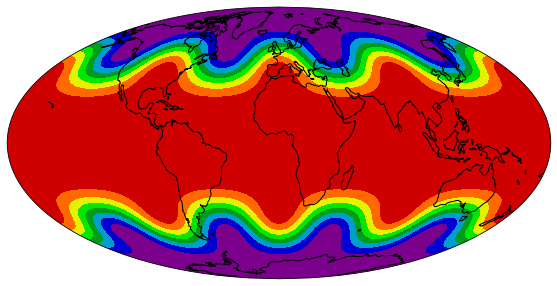

In [4]:
"""
Filled contours
---------------

An example of contourf on manufactured data.

"""

import matplotlib.pyplot as plt
import numpy as np

import cartopy.crs as ccrs


def sample_data(shape=(73, 145)):
    """Return ``lons``, ``lats`` and ``data`` of some fake data."""
    nlats, nlons = shape
    lats = np.linspace(-np.pi / 2, np.pi / 2, nlats)
    lons = np.linspace(0, 2 * np.pi, nlons)
    lons, lats = np.meshgrid(lons, lats)
    wave = 0.75 * (np.sin(2 * lats) ** 8) * np.cos(4 * lons)
    mean = 0.5 * np.cos(2 * lats) * ((np.sin(2 * lats)) ** 2 + 2)

    lats = np.rad2deg(lats)
    lons = np.rad2deg(lons)
    data = wave + mean

    return lons, lats, data


def main():
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mollweide())

    lons, lats, data = sample_data()

    ax.contourf(lons, lats, data,
                transform=ccrs.PlateCarree(),
                cmap='nipy_spectral')
    ax.coastlines()
    ax.set_global()
    plt.show()


if __name__ == '__main__':
    main()


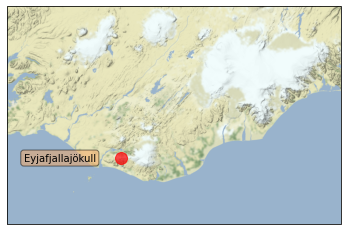

In [5]:
"""
Map tile acquisition
--------------------

Demonstrates cartopy's ability to draw map tiles which are downloaded on
demand from the Stamen tile server. Internally these tiles are then combined
into a single image and displayed in the cartopy GeoAxes.

"""

import matplotlib.pyplot as plt
from matplotlib.transforms import offset_copy

import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt


def main():
    # Create a Stamen terrain background instance.
    stamen_terrain = cimgt.Stamen('terrain-background')

    fig = plt.figure()

    # Create a GeoAxes in the tile's projection.
    ax = fig.add_subplot(1, 1, 1, projection=stamen_terrain.crs)

    # Limit the extent of the map to a small longitude/latitude range.
    ax.set_extent([-22, -15, 63, 65], crs=ccrs.Geodetic())

    # Add the Stamen data at zoom level 8.
    ax.add_image(stamen_terrain, 8)

    # Add a marker for the Eyjafjallajökull volcano.
    ax.plot(-19.613333, 63.62, marker='o', color='red', markersize=12,
            alpha=0.7, transform=ccrs.Geodetic())

    # Use the cartopy interface to create a matplotlib transform object
    # for the Geodetic coordinate system. We will use this along with
    # matplotlib's offset_copy function to define a coordinate system which
    # translates the text by 25 pixels to the left.
    geodetic_transform = ccrs.Geodetic()._as_mpl_transform(ax)
    text_transform = offset_copy(geodetic_transform, units='dots', x=-25)

    # Add text 25 pixels to the left of the volcano.
    ax.text(-19.613333, 63.62, 'Eyjafjallajökull',
            verticalalignment='center', horizontalalignment='right',
            transform=text_transform,
            bbox=dict(facecolor='sandybrown', alpha=0.5, boxstyle='round'))
    plt.show()


if __name__ == '__main__':
    main()

C:\Users\kevin\anaconda3\lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_1_states_provinces_lakes.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


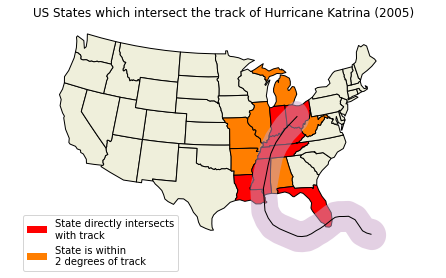

In [3]:
"""
Hurricane Katrina
-----------------

This example uses the power of Shapely to illustrate states that are likely to
have been significantly impacted by Hurricane Katrina.

"""

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import shapely.geometry as sgeom

import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader


def sample_data():
    """
    Return a list of latitudes and a list of longitudes (lons, lats)
    for Hurricane Katrina (2005).

    The data was originally sourced from the HURDAT2 dataset from AOML/NOAA:
    https://www.aoml.noaa.gov/hrd/hurdat/newhurdat-all.html on 14th Dec 2012.

    """
    lons = [-75.1, -75.7, -76.2, -76.5, -76.9, -77.7, -78.4, -79.0,
            -79.6, -80.1, -80.3, -81.3, -82.0, -82.6, -83.3, -84.0,
            -84.7, -85.3, -85.9, -86.7, -87.7, -88.6, -89.2, -89.6,
            -89.6, -89.6, -89.6, -89.6, -89.1, -88.6, -88.0, -87.0,
            -85.3, -82.9]

    lats = [23.1, 23.4, 23.8, 24.5, 25.4, 26.0, 26.1, 26.2, 26.2, 26.0,
            25.9, 25.4, 25.1, 24.9, 24.6, 24.4, 24.4, 24.5, 24.8, 25.2,
            25.7, 26.3, 27.2, 28.2, 29.3, 29.5, 30.2, 31.1, 32.6, 34.1,
            35.6, 37.0, 38.6, 40.1]

    return lons, lats


def main():
    fig = plt.figure()
    # to get the effect of having just the states without a map "background"
    # turn off the background patch and axes frame
    ax = fig.add_axes([0, 0, 1, 1], projection=ccrs.LambertConformal(),
                      frameon=False)
    ax.patch.set_visible(False)

    ax.set_extent([-125, -66.5, 20, 50], ccrs.Geodetic())

    shapename = 'admin_1_states_provinces_lakes'
    states_shp = shpreader.natural_earth(resolution='110m',
                                         category='cultural', name=shapename)

    lons, lats = sample_data()

    ax.set_title('US States which intersect the track of '
                 'Hurricane Katrina (2005)')

    # turn the lons and lats into a shapely LineString
    track = sgeom.LineString(zip(lons, lats))

    # buffer the linestring by two degrees (note: this is a non-physical
    # distance)
    track_buffer = track.buffer(2)

    def colorize_state(geometry):
        facecolor = (0.9375, 0.9375, 0.859375)
        if geometry.intersects(track):
            facecolor = 'red'
        elif geometry.intersects(track_buffer):
            facecolor = '#FF7E00'
        return {'facecolor': facecolor, 'edgecolor': 'black'}

    ax.add_geometries(
        shpreader.Reader(states_shp).geometries(),
        ccrs.PlateCarree(),
        styler=colorize_state)

    ax.add_geometries([track_buffer], ccrs.PlateCarree(),
                      facecolor='#C8A2C8', alpha=0.5)
    ax.add_geometries([track], ccrs.PlateCarree(),
                      facecolor='none', edgecolor='k')

    # make two proxy artists to add to a legend
    direct_hit = mpatches.Rectangle((0, 0), 1, 1, facecolor="red")
    within_2_deg = mpatches.Rectangle((0, 0), 1, 1, facecolor="#FF7E00")
    labels = ['State directly intersects\nwith track',
              'State is within \n2 degrees of track']
    ax.legend([direct_hit, within_2_deg], labels,
              loc='lower left', bbox_to_anchor=(0.025, -0.1), fancybox=True)

    plt.show()


if __name__ == '__main__':
    main()

C:\Users\kevin\anaconda3\lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


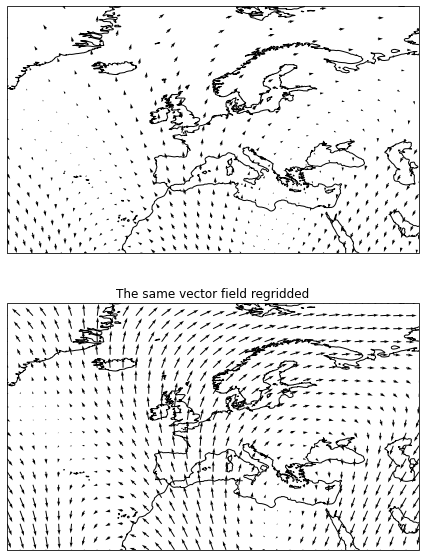

In [7]:
"""
Regridding vectors with quiver
------------------------------

This example demonstrates the regridding functionality in quiver (there exists
equivalent functionality in :meth:`cartopy.mpl.geoaxes.GeoAxes.barbs`).

Regridding can be an effective way of visualising a vector field, particularly
if the data is dense or warped.

"""
import matplotlib.pyplot as plt
import numpy as np

import cartopy.crs as ccrs


def sample_data(shape=(20, 30)):
    """
    Return ``(x, y, u, v, crs)`` of some vector data
    computed mathematically. The returned CRS will be a North Polar
    Stereographic projection, meaning that the vectors will be unevenly
    spaced in a PlateCarree projection.

    """
    crs = ccrs.NorthPolarStereo()
    scale = 1e7
    x = np.linspace(-scale, scale, shape[1])
    y = np.linspace(-scale, scale, shape[0])

    x2d, y2d = np.meshgrid(x, y)
    u = 10 * np.cos(2 * x2d / scale + 3 * y2d / scale)
    v = 20 * np.cos(6 * x2d / scale)

    return x, y, u, v, crs


def main():
    fig = plt.figure(figsize=(8, 10))

    x, y, u, v, vector_crs = sample_data(shape=(50, 50))
    ax1 = fig.add_subplot(2, 1, 1, projection=ccrs.PlateCarree())
    ax1.coastlines('50m')
    ax1.set_extent([-45, 55, 20, 80], ccrs.PlateCarree())
    ax1.quiver(x, y, u, v, transform=vector_crs)

    ax2 = fig.add_subplot(2, 1, 2, projection=ccrs.PlateCarree())
    ax2.set_title('The same vector field regridded')
    ax2.coastlines('50m')
    ax2.set_extent([-45, 55, 20, 80], ccrs.PlateCarree())
    ax2.quiver(x, y, u, v, transform=vector_crs, regrid_shape=20)

    plt.show()


if __name__ == '__main__':
    main()


### Questions

- What are the limitations of this software? Is it able to map any geological/weather event? 

- What kind of problems could this solve? Is it solely a visual library for easy map reading?

### Project Idea

- I would like to use this package to visually display a map depicting various weather events around the globe. This can include hurricanes, volcanic erruptions, northern lights, or tsunamis. 

- It would be intersting to test the efficiency of the projections utilized to see whether they are considered to be "fast."

There seems to be a lot of possibilities with this package, as there is a multitude of examples provided in the GitHub.